# Problem Statement

The primary objective of this project is to develop a machine learning model capable of accurately identifying fraudulent credit card transactions. This task holds significant importance for both financial institutions and customers. For banks, detecting fraud is critical to preventing financial losses and safeguarding customer assets. Each fraudulent transaction not only represents a direct financial loss but also impacts the bank’s reputation and customer trust.

The dataset utilized for this project encompasses credit card transactions from European cardholders over a span of two days in September 2013. It is characterized by a severe class imbalance, with fraudulent transactions constituting only 0.172% of the total transactions. Addressing this imbalance is essential to building an effective model.

The project involves exploring various machine learning algorithms and techniques to manage the data imbalance and identify the most effective model. By evaluating different approaches, the goal is to enhance the detection of fraudulent transactions, ultimately supporting the bank’s efforts to protect both their customers and their financial interests.

In [77]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, classification_report, precision_recall_curve,accuracy_score,make_scorer,f1_score,roc_auc_score,auc,roc_curve,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
df=pd.read_csv("C:/Users/harsh/Downloads/creditcard.csv.zip")

# Exploratory Data Analysis

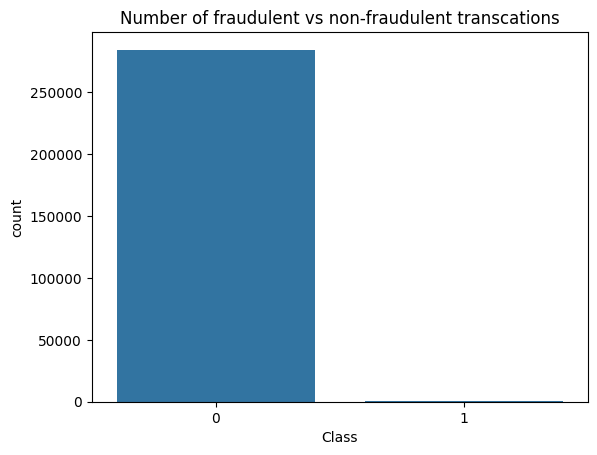

In [71]:
# Number of instances in each class
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

In [72]:
X=df.drop(columns=['Time','Amount','Class'],axis=1)
Y=df['Class']

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<Axes: >

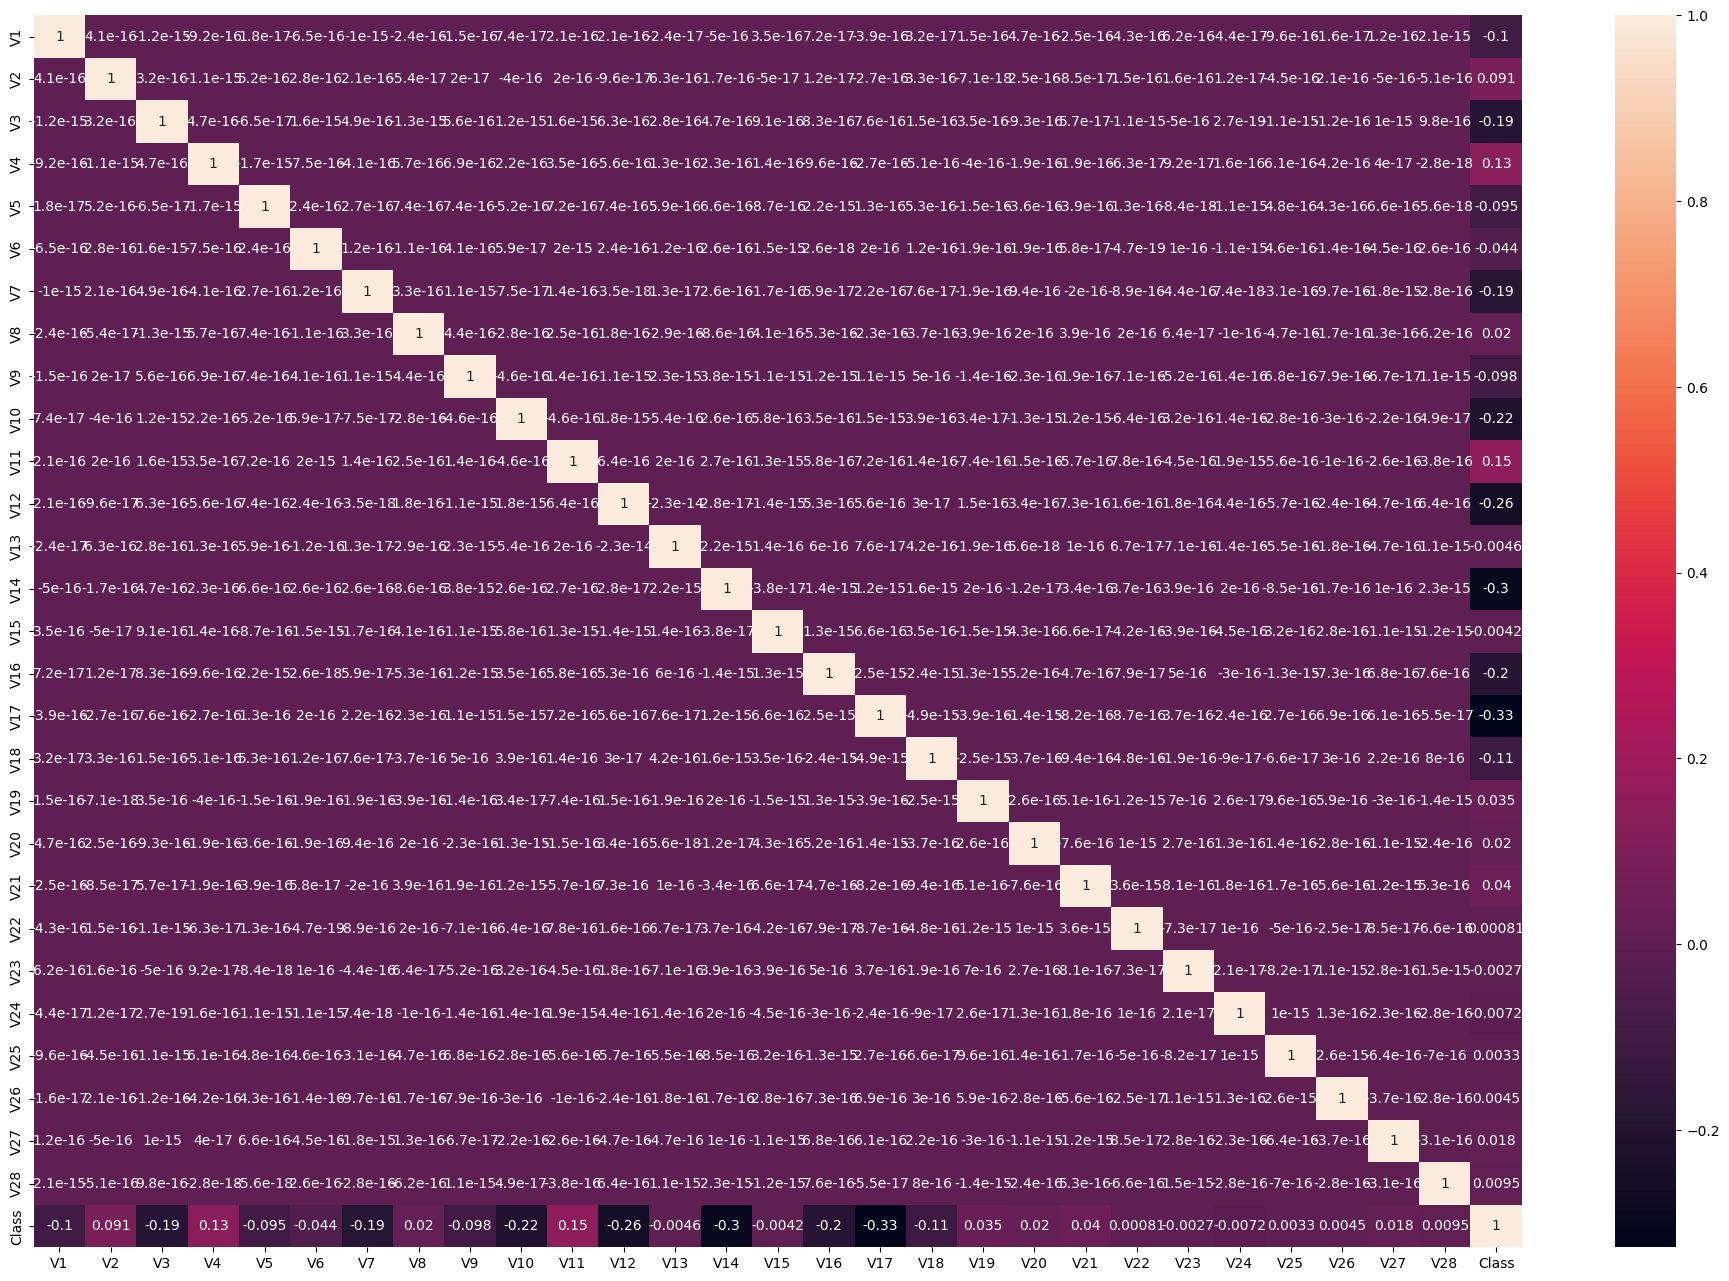

In [148]:
# Heatmap for correlation
df_corr=df.drop(columns=['Time','Amount']).corr()
plt.figure(figsize=(24, 16))
sns.heatmap(df_corr, annot=True)

## Logistic Regression with adjusted weights

In [74]:

model= LogisticRegression()

param_grid = {
    'C': [0.1, 1],    
    'class_weight': [{0: 1, 1: v} for v in np.linspace(1,20,30)]
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1score': make_scorer(f1_score),
            'roc_auc':make_scorer(roc_auc_score)},
    refit='f1score',
    cv=3,           # Number of cross-validation folds
    verbose=1,      # Verbosity level
    n_jobs=-1       # Use all available cores
)

    
    

grid_search.fit(X_train,Y_train)




Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1],
                         'class_weight': [{0: 1, 1: np.float64(1.0)},
                                          {0: 1,
                                           1: np.float64(1.6551724137931034)},
                                          {0: 1,
                                           1: np.float64(2.310344827586207)},
                                          {0: 1,
                                           1: np.float64(2.9655172413793105)},
                                          {0: 1,
                                           1: np.float64(3.6206896551724137)},
                                          {0: 1,
                                           1: np.float64(4.275862068965517)},
                                          {0: 1,
                                           1: np.float64(4.93103448275862...
                                          {0: 1,
                                           1: np.float64(19.344827586206897)},
                                          {0: 1, 1: np.float64(20.0)}]},
             refit='f1score',
             scoring={'f1score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')},
             verbose=1)

Best parameters found:  {'C': 0.1, 'class_weight': {0: 1, 1: np.float64(4.931034482758621)}}
Best F1-score:  0.799795081967213
Test Accuracy: 0.9993
Test F1 Score: 0.7876
Test roc_auc Score: 0.9840
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71084
           1       0.82      0.75      0.79       118

    accuracy                           1.00     71202
   macro avg       0.91      0.88      0.89     71202
weighted avg       1.00      1.00      1.00     71202



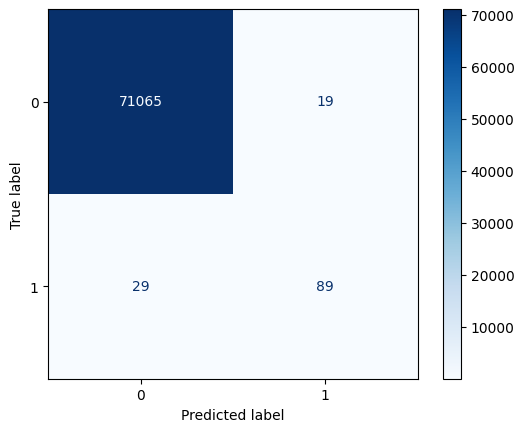

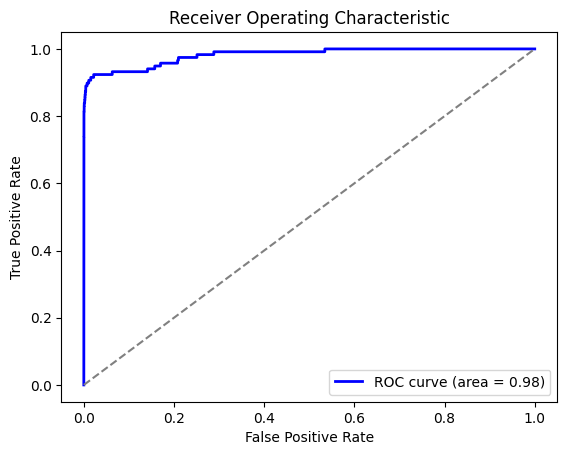

Threshold value: 0.008871217472405572


In [76]:

print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred=best_model.predict(X_test)
data=pd.DataFrame(grid_search.cv_results_)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test roc_auc Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

threshold=thresholds[np.argmax(tpr-fpr)]
print("Threshold value:",threshold)

## XGBoost 

In [46]:

model= xgb.XGBClassifier()

param_grid = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100,200],
    'max_depth': [3, 6],
    'objective':['binary:logistic']
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1score': make_scorer(f1_score),
            'roc_auc':make_scorer(roc_auc_score)},
    refit='f1score',
    cv=2,        
    verbose=2,      
    n_jobs=-1      
)

    
    

grid_search.fit(X_train,Y_train)


Fitting 2 folds for each of 160 candidates, totalling 320 fits


C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:42:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 6],
                         'n_estimators': [100, 200],
                         'objective': ['binary:logistic']},
             refit='f1score',
             scoring={'f1score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')},
             verbose=2)

Best parameters found:  {'class_weight': {0: 1, 1: np.float64(1.0)}, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'objective': 'binary:logistic'}
Best F1-score:  0.9996858888595457
Test Accuracy: 0.9993
Test F1 Score: 0.7801
Test roc_auc Score: 0.9799
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.78      0.78      0.78       120

    accuracy                           1.00     71202
   macro avg       0.89      0.89      0.89     71202
weighted avg       1.00      1.00      1.00     71202



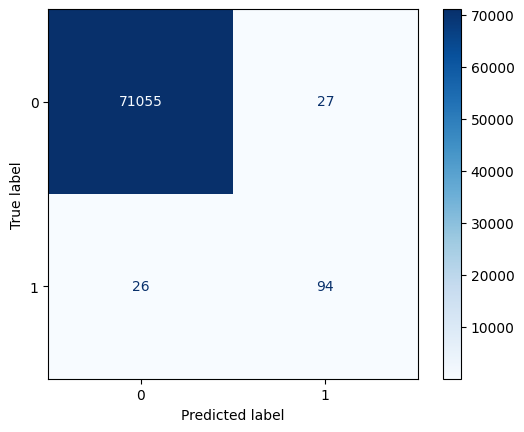

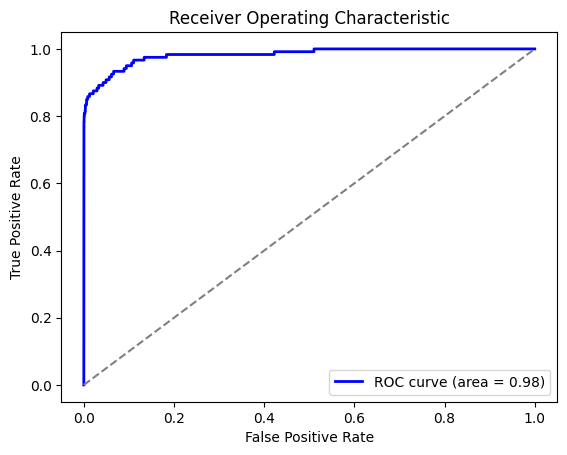

In [47]:

print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred=best_model.predict(X_test)
data=pd.DataFrame(grid_search.cv_results_)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test roc_auc Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

threshold=thresholds[np.argmax(tpr-fpr)]
print("Threshold value:",threshold)

## Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [80]:

model_ranfor= RandomForestClassifier()

param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth':  [10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]# Whether bootstrap samples are used when building trees
}
grid_search_ranfor = GridSearchCV(
    estimator=model_ranfor,
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1score': make_scorer(f1_score),
            'roc_auc':make_scorer(roc_auc_score)},
    refit='f1score',
    cv=2,        
    verbose=2,      
    n_jobs=-1      
)

    
    

grid_search_ranfor.fit(X_train,Y_train)


Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             refit='f1score',
             scoring={'f1score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')},
             verbose=2)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best F1-score:  0.8403903208657029
Test Accuracy: 0.9995
Test F1 Score: 0.8372
Test roc_auc Score: 0.9756
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71084
           1       0.93      0.76      0.84       118

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



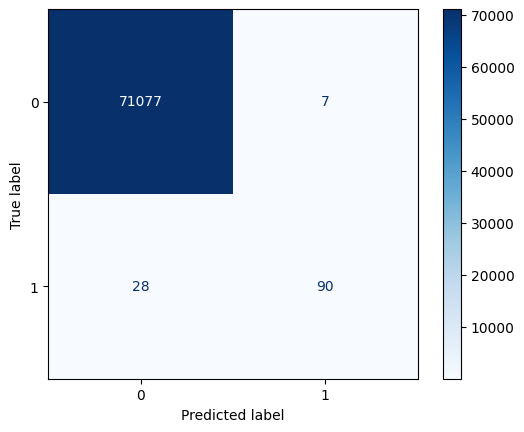

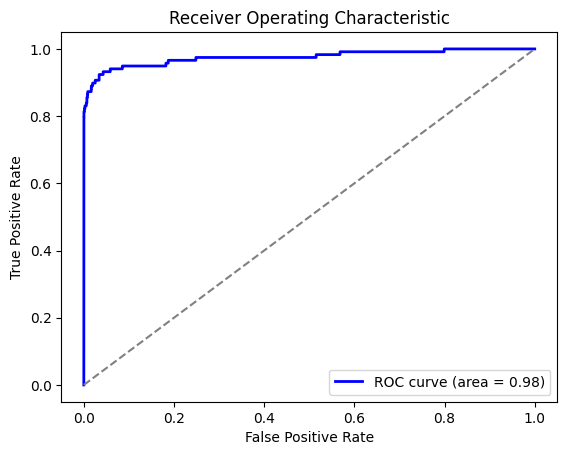

In [83]:

print("Best parameters found: ", grid_search_ranfor.best_params_)
print("Best F1-score: ", grid_search_ranfor.best_score_)

best_model = grid_search_ranfor.best_estimator_

y_pred=best_model.predict(X_test)
data=pd.DataFrame(grid_search_ranfor.cv_results_)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_proba)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test roc_auc Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')



fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



 ## Undersampling using SMOTE to handle class-imbalance

## Logistic Regression

In [40]:
smote=SMOTE()
X_train,Y_train=smote.fit_resample(X_train,Y_train)
print("size of training set:",len(Y_train))

size of training set: 426466


In [10]:
model= LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10],    
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1score': make_scorer(f1_score),},
    refit='f1score',
    cv=3,        
    verbose=1,      
    n_jobs=-1      
)

grid_search.fit(X_train,Y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_

y_pred=best_model.predict(X_test)



Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found:  {'C': 10}
Best F1-score:  0.9501119536797481


Test Accuracy: 0.9739
Test F1 Score: 0.1153
Test roc_auc Score: 0.9708
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     71067
           1       0.06      0.90      0.12       135

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.99     71202



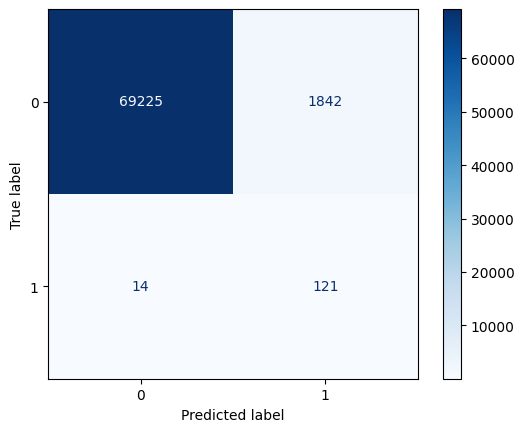

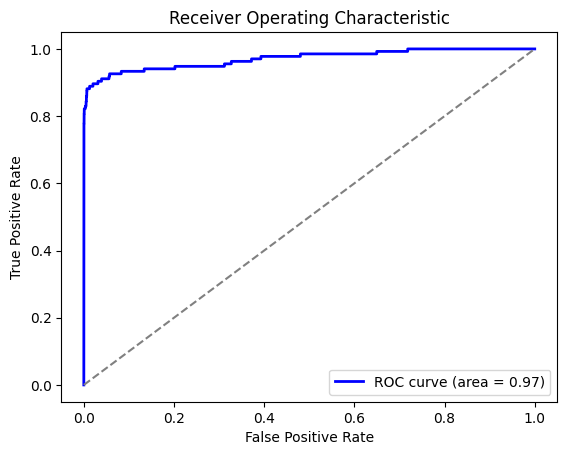

In [12]:
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_proba)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test roc_auc Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
threshold=thresholds[np.argmax(tpr-fpr)]
print("Threshold value:",threshold)

## XGBoost

In [41]:

model= xgb.XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'objective':['binary:logistic']
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1score': make_scorer(f1_score),
            'roc_auc':make_scorer(roc_auc_score)},
    refit='f1score',
    cv=3,        
    verbose=2,      
    n_jobs=-1      
)

    
    

grid_search.fit(X_train,Y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                         'n_estimators': [100, 200],
                         'objective': ['binary:logistic'],
                         'subsample': [0.8, 1.0]},
             refit='f1score',
             scoring={'f1score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')},
             verbose=2)

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.8}
Best F1-score:  0.9997655733373788
Test Accuracy: 0.9992
Test F1 Score: 0.7581
Test roc_auc Score: 0.9799
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.73      0.78      0.76       120

    accuracy                           1.00     71202
   macro avg       0.87      0.89      0.88     71202
weighted avg       1.00      1.00      1.00     71202



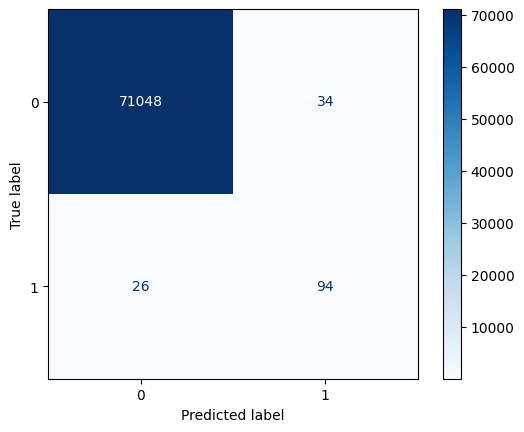

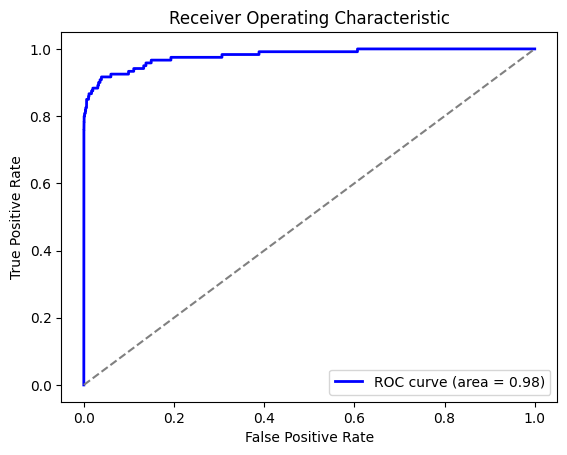

In [42]:

print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred=best_model.predict(X_test)
data=pd.DataFrame(grid_search.cv_results_)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_proba)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test roc_auc Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')



fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

threshold=thresholds[np.argmax(tpr-fpr)]
print("Threshold value:",threshold)

## Random Forest

In [15]:

model= RandomForestClassifier()

param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth':  [10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]# Whether bootstrap samples are used when building trees
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1score': make_scorer(f1_score),
            'roc_auc':make_scorer(roc_auc_score)},
    refit='f1score',
    cv=2,        
    verbose=2,      
    n_jobs=-1      
)

    
    

grid_search.fit(X_train,Y_train)


Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             refit='f1score',
             scoring={'f1score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')},
             verbose=2)

Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-score:  0.999831208857126
Test Accuracy: 0.9994
Test F1 Score: 0.8390
Test roc_auc Score: 0.9599
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71067
           1       0.85      0.83      0.84       135

    accuracy                           1.00     71202
   macro avg       0.92      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202



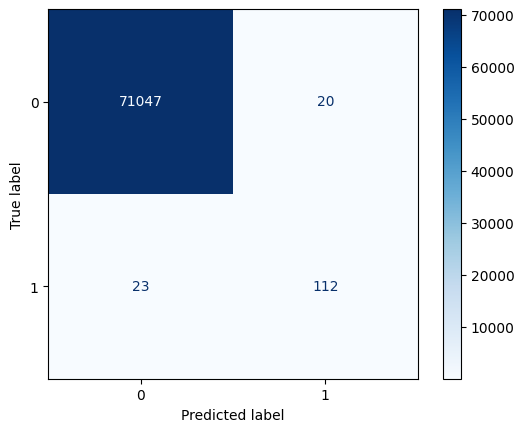

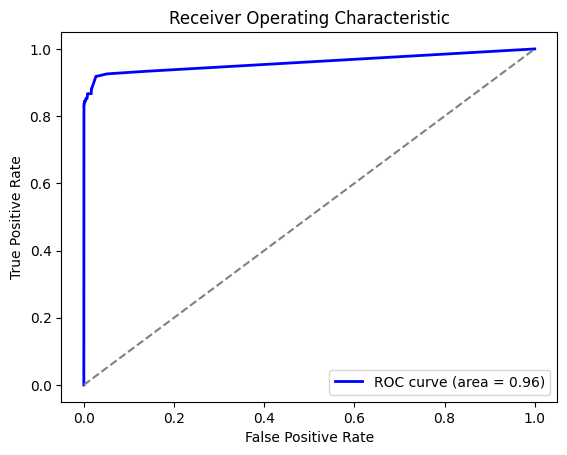

In [16]:

print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred=best_model.predict(X_test)
data=pd.DataFrame(grid_search.cv_results_)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_proba)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test roc_auc Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')



fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

threshold=thresholds[np.argmax(tpr-fpr)]
print("Threshold value:",threshold)

## Over-sampling using ADASYN to handle class imbalance

In [19]:
X=df.drop(columns=['Time','Amount','Class'],axis=1)
Y=df['Class']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_train,Y_train=adasyn.fit_resample(X_train,Y_train)

In [22]:

model= LogisticRegression()


param_grid = {
    'C': [0.1, 1, 10],    
    #'class_weight': [{0: 1, 1: v} for v in np.linspace(1,20,30)]
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1score': make_scorer(f1_score),},
    refit='f1score',
    cv=3,           # Number of cross-validation folds
    verbose=1,      # Verbosity level
    n_jobs=-1       # Use all available cores
)

    
    

grid_search.fit(X_train,Y_train)



Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10]}, refit='f1score',
             scoring={'f1score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')},
             verbose=1)

Best parameters found:  {'C': 10}
Best F1-score:  0.8623542242678703
Test Accuracy: 0.9145
Test F1 Score: 0.0389
Test roc_auc Score: 0.9742
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.96     71069
           1       0.02      0.92      0.04       133

    accuracy                           0.91     71202
   macro avg       0.51      0.92      0.50     71202
weighted avg       1.00      0.91      0.95     71202



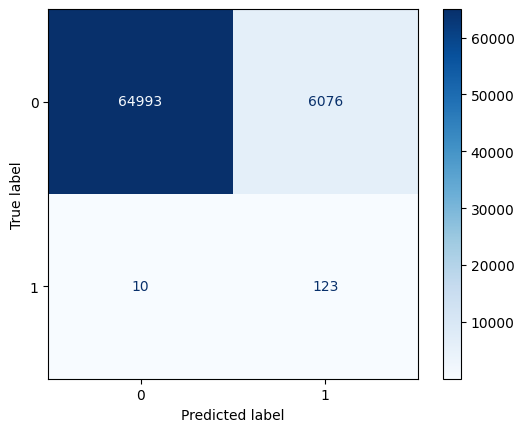

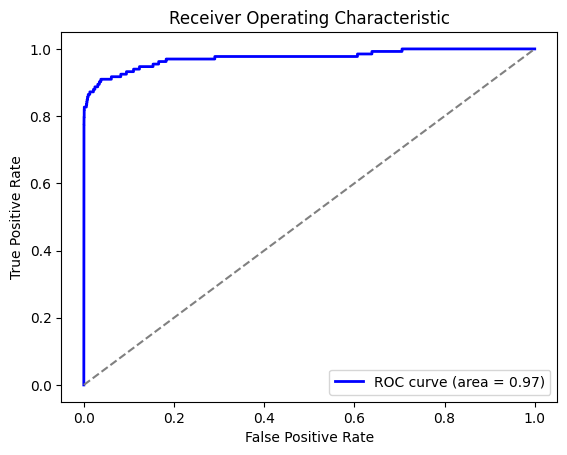

In [23]:

print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred=best_model.predict(X_test)
data=pd.DataFrame(grid_search.cv_results_)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_proba)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test roc_auc Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')



fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



## Using Random Undersampling

In [49]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X=df.drop(columns=['Time','Amount','Class'],axis=1)
Y=df['Class']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train, Y_train = undersample.fit_resample(X_train, Y_train)
print(len(X_train))
print(len(Y_train))

754
754


## Logistic Regression

In [64]:

model= LogisticRegression()

param_grid = {
    'C': [0.1, 1,10],   
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1score': make_scorer(f1_score),},
    refit='f1score',
    cv=3,           # Number of cross-validation folds
    verbose=1,      # Verbosity level
    n_jobs=-1       # Use all available cores
)

    
    

grid_search.fit(X_train,Y_train)



Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10]}, refit='f1score',
             scoring={'f1score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')},
             verbose=1)

Best parameters found:  {'C': 0.1}
Best F1-score:  0.9372532813639144
Test Accuracy: 0.9771
Test F1 Score: 0.1134
Test roc_auc Score: 0.9857
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71087
           1       0.06      0.90      0.11       115

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.98      0.99     71202



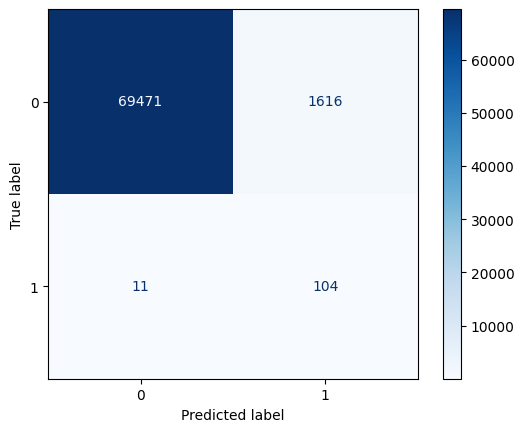

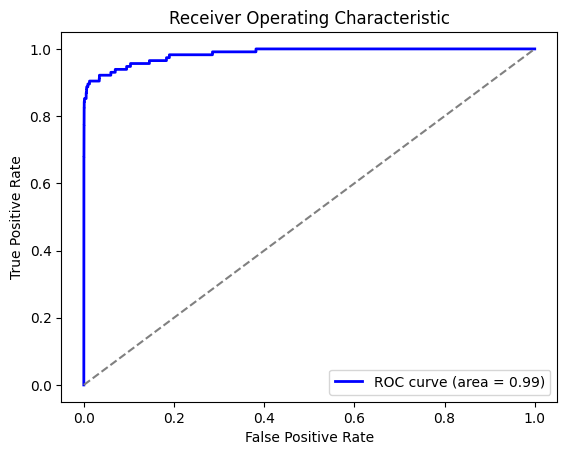

Threshold value: 0.6568952801330192


In [65]:

print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred=best_model.predict(X_test)
data=pd.DataFrame(grid_search.cv_results_)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_proba)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test roc_auc Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')



fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

threshold=thresholds[np.argmax(tpr-fpr)]
print("Threshold value:",threshold)


## XGBoost

In [66]:

model= xgb.XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'objective':['binary:logistic']
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1score': make_scorer(f1_score),
            'roc_auc':make_scorer(roc_auc_score)},
    refit='f1score',
    cv=3,        
    verbose=2,      
    n_jobs=-1      
)

    
    

grid_search.fit(X_train,Y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                         'n_estimators': [100, 200],
                         'objective': ['binary:logistic'],
                         'subsample': [0.8, 1.0]},
             refit='f1score',
             scoring={'f1score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')},
             verbose=2)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.8}
Best F1-score:  0.9398493899263585
Test Accuracy: 0.9625
Test F1 Score: 0.0742
Test roc_auc Score: 0.9867
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     71087
           1       0.04      0.93      0.07       115

    accuracy                           0.96     71202
   macro avg       0.52      0.95      0.53     71202
weighted avg       1.00      0.96      0.98     71202



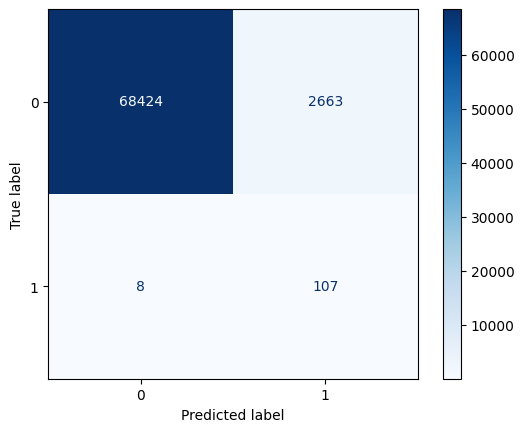

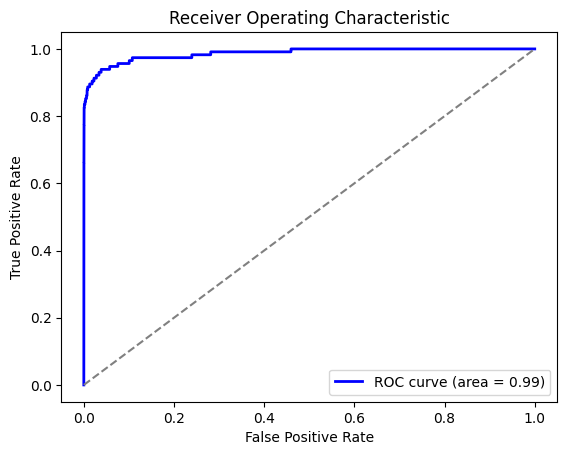

Threshold value: 0.48802924


In [67]:

print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred=best_model.predict(X_test)
data=pd.DataFrame(grid_search.cv_results_)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_proba)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test roc_auc Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')



fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

threshold=thresholds[np.argmax(tpr-fpr)]
print("Threshold value:",threshold)

## Random Forest

In [68]:

model= RandomForestClassifier()

param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth':  [10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]# Whether bootstrap samples are used when building trees
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1score': make_scorer(f1_score),
            'roc_auc':make_scorer(roc_auc_score)},
    refit='f1score',
    cv=2,        
    verbose=2,      
    n_jobs=-1      
)

    
    

grid_search.fit(X_train,Y_train)


Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             refit='f1score',
             scoring={'f1score': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict')},
             verbose=2)

Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best F1-score:  0.9320728291316527
Test Accuracy: 0.9733
Test F1 Score: 0.0985
Test roc_auc Score: 0.9840
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     71087
           1       0.05      0.90      0.10       115

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.54     71202
weighted avg       1.00      0.97      0.99     71202



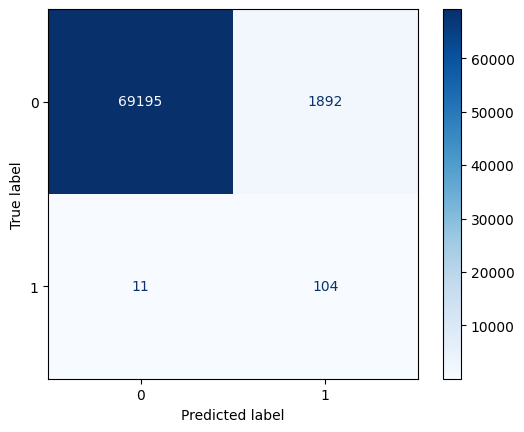

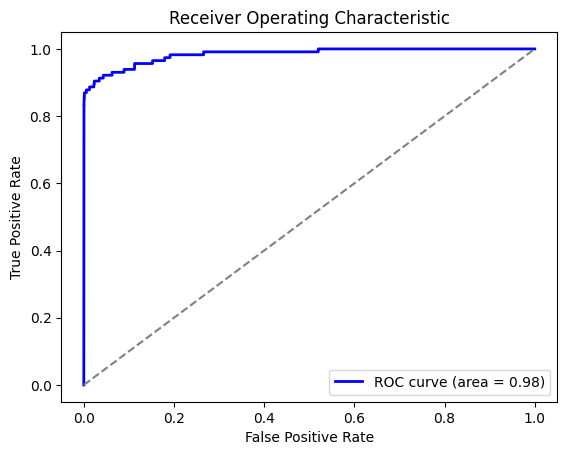

Threshold value: 0.5242124819624819


In [69]:

print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred=best_model.predict(X_test)
data=pd.DataFrame(grid_search.cv_results_)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(Y_test,y_pred_proba)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test roc_auc Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')



fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

threshold=thresholds[np.argmax(tpr-fpr)]
print("Threshold value:",threshold)

# Model Performance Summary
In our evaluation of various models for credit card fraud detection, we observed that while most models achieved satisfactory ROC AUC scores, the precision varied significantly. In real-world applications, where each flagged transaction requires manual verification, models with higher precision are preferred to minimize resource expenditure.
XGBoost and Random forest with SMOTE had the high f1 score and roc_auc score. Logistic regression with adjusted weights had high f1 score and roc_auc score,whereas Logistic regression in SMOTE/ADASYN/Random undersampling had high auc but low f1score because of low precision. So the best models were Logistic regression with adjusted weights with f1score of 0.80 and roc_auc_score of 0.98 and Random Forest Classifer with SMOTE achieving an f1 score of 0.85 and roc_auc_score of 0.96.
## Cost-Benefit Analysis for Credit Card Fraud Detection Models

**Logistic Regression with Adjusted Weights:**

* F1 Score: 0.80
* ROC AUC Score: 0.98
* Key Advantage: High ROC AUC score, indicating strong overall classification performance.
* Key Disadvantage: Lower F1 score due to lower precision, which may result in higher verification costs.

**Random Forest Classifier with SMOTE:**

* F1 Score: 0.85
* ROC AUC Score: 0.96
* Key Advantage: High F1 score, reflecting a good balance between precision and recall, making it more suitable for scenarios where false positives need to be minimized.
* Key Disadvantage: Higher computational cost compared to Logistic Regression.
* Cost-Benefit Considerations:

**Computational Cost:**
* Logistic Regression: Lower computational cost, making it suitable for environments with limited resources.
* Random Forest with SMOTE: Higher computational cost due to the complexity of the Random Forest algorithm and the additional processing required for SMOTE.
 
**Operational Efficiency:**
* Logistic Regression: While it has a lower F1 score, it is less resource-intensive and could be more feasible for real-time applications where computational efficiency is critical.
* Random Forest with SMOTE: Offers a higher F1 score, reducing the number of false positives and potentially decreasing the resources needed for verification. However, it may be more costly to implement due to higher computational requirements.
Recommendation:

**For optimal F1 score:** Random Forest with SMOTE is preferred, as it achieves the highest F1 score, balancing precision and recall effectively.
**For cost-effective solutions:** Logistic Regression with adjusted weights provides a good compromise between performance and computational cost, making it suitable for scenarios where resource constraints are significant.
## Conclusion:
Choose Random Forest with SMOTE if the primary goal is to optimize for F1 score and minimize false positives. Opt for Logistic Regression with adjusted weights if computational efficiency and cost are paramount.